In [103]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "data/"
file_name = ['chicago_2019.csv', 'chicago_2020.csv', 'chicago_2021.csv', 'chicago_2022.csv']
filenames =[path + file for file in file_name]
#print(filenames)

""" 
    Read Me: Basic File Merger, to combine the 2019-2022 census data
    Requires: file path list
"""
def fileMerger(path):
    df1 = pd.read_csv(path[0])
    df2 = pd.read_csv(path[1])
    df_merged = df1.merge(df2, how='outer')
    for file in path[2:]:
        temp = pd.read_csv(file)
        df_merged = df_merged.merge(temp, how='outer')
    return df_merged

df = fileMerger(filenames)

In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,9.221480e+05,922148.000000,922148.000000,922103.000000,922146.000000,9.049190e+05,9.049190e+05,922148.000000,904919.000000,904919.000000
mean,1.221443e+07,1146.815074,11.238972,23.217671,36.827123,1.165107e+06,1.886122e+06,2020.462154,41.843105,-87.669631
std,7.862947e+05,699.514043,6.990050,13.949060,21.532460,1.652794e+04,3.192904e+04,1.155203,0.087818,0.060094
min,2.436800e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2019.000000,36.619446,-91.686566
25%,1.189541e+07,611.000000,6.000000,10.000000,23.000000,1.153405e+06,1.858575e+06,2019.000000,41.767226,-87.712174
50%,1.224557e+07,1031.000000,10.000000,24.000000,32.000000,1.166932e+06,1.892271e+06,2020.000000,41.860150,-87.663092
75%,1.260350e+07,1722.000000,17.000000,34.000000,54.000000,1.176718e+06,1.908962e+06,2022.000000,41.905914,-87.627189
max,1.340032e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951527e+06,2022.000000,42.022586,-87.524529


In [7]:
df["Description"] = df["Description"].astype("string")
df["Has Location"] = df[df["Location"].isnull() == True]

In [ ]:
is_crimes = df[df["Location"].isnull() == False]
is_crimes = is_crimes.groupby("Primary Type").size().sort_values(ascending=False)
fig = sns.barplot(x=is_crimes, y=is_crimes.index, hue = is_crimes.index, dodge=False)
plt.title("Types of Crimes with Location Data")
plt.xlabel("Number of Crimes")
plt.ylabel("Type of Crime")

### Most crimes that didn't have a location were deceptive practices, such as fraud. These have less locations

In [ ]:
na_crimes = df[df["Location"].isnull() == True]
na_crimes = na_crimes.groupby("Primary Type").size().sort_values(ascending=False)
fig = sns.barplot(x=na_crimes, y=na_crimes.index, hue = na_crimes.index, dodge=False)
plt.title("Types of Crimes with No Location Data")
plt.xlabel("Number of Crimes")
plt.ylabel("Type of Crime")

In [64]:
df.isna().sum()
df2 = df.copy(deep=True)
df2.dropna(subset=['Latitude', 'Longitude', 'Location', 'X Coordinate', 'Y Coordinate'], inplace = True)
df2.dropna(subset=['Location Description'], inplace=True)
df2.dropna(subset=['Ward', 'Community Area'], inplace=True)
print(f"Retained { round(((df2.shape[0] / df.shape[0]) * 100), 4)}% of Data")

Retained 97.7495% of Data


In [65]:
df2.head(14)
#drop unnecessary columns
df2 = df2.drop('Case Number', axis=1)
df2 = df2.drop('FBI Code', axis=1)
df2 = df2.drop('Updated On', axis=1)

In [66]:
df2.describe()
df2['Primary Type'].value_counts()

Primary Type
THEFT                                194717
BATTERY                              171824
CRIMINAL DAMAGE                      103131
ASSAULT                               79733
DECEPTIVE PRACTICE                    62881
OTHER OFFENSE                         56957
MOTOR VEHICLE THEFT                   50713
ROBBERY                               32664
WEAPONS VIOLATION                     32405
BURGLARY                              32393
NARCOTICS                             30389
CRIMINAL TRESPASS                     18530
OFFENSE INVOLVING CHILDREN             7752
CRIMINAL SEXUAL ASSAULT                4632
SEX OFFENSE                            4357
PUBLIC PEACE VIOLATION                 4078
INTERFERENCE WITH PUBLIC OFFICER       2903
HOMICIDE                               2845
ARSON                                  1908
PROSTITUTION                           1333
STALKING                               1204
CRIM SEXUAL ASSAULT                     982
LIQUOR LAW VIOLATIO

In [69]:
#basic feature engineering tasks
df2['Date-Time'] = pd.to_datetime(df2['Date'])
def month(x):
    return(int(x.strftime("%m")))
df2['Month'] = df2['Date-Time'].apply(month)

def day(x):
    return(int(x.strftime('%w')))
df2['Day'] = df2['Date-Time'].apply(day)

def hour(x):
    return int(x.strftime("%H"))
df2['Hour'] = df2['Date-Time'].apply(hour)

/var/folders/g4/ykwfgyl55t7dfzv_zc3dcshh0000gn/T/ipykernel_2069/3134497415.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Date-Time'] = pd.to_datetime(df2['Date'])


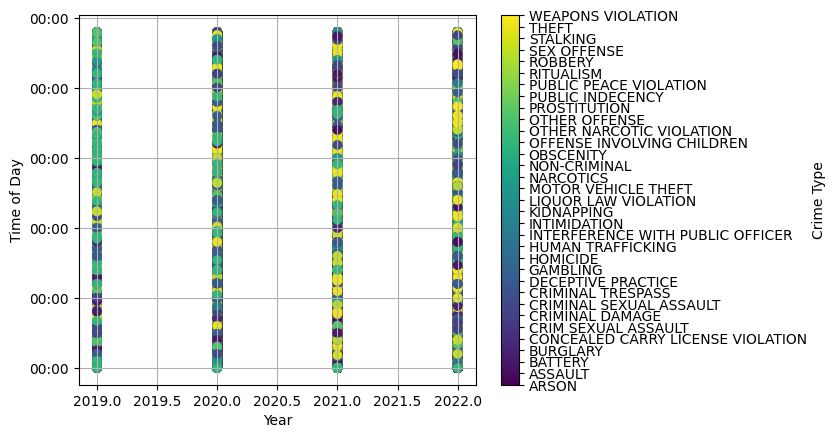

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
df2['Year'] = df2['Date-Time'].dt.year
df2['Time'] = df2['Date-Time'].dt.hour + df2['Date-Time'].dt.minute / 60
df2['CrimeTypeCategory'] = df2['Primary Type'].astype('category').cat.codes

fig, ax = plt.subplots()
scatter = ax.scatter(df2['Year'], df2['Time'], c=df2['CrimeTypeCategory'], cmap='viridis')
# Create a color bar with the crime type labels
colorbar = plt.colorbar(scatter, ticks=df2['CrimeTypeCategory'].unique())
colorbar.set_label('Crime Type')
colorbar.set_ticklabels(df2['Primary Type'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Time of Day')
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid(True)
plt.show()

Ignore above, the code doesn't run properly, neither does it make a cohesive way to filter out case-by-case basis for crime frequency. Come back to this code cell later, some minor issues.

In [26]:
df2['CrimeTypeCategory'].value_counts()
df2.head(25)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Date-Time,Month,Day,Hour,Time,CrimeTypeCategory
0,24368,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,09/01/2022 03:42:17 PM,41.802909,-87.621048,"(41.802908524, -87.62104831)",2019-01-03 14:37:00,1,4,14,14.616667,11
1,24369,JC103046,01/03/2019 02:37:00 PM,050XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,09/01/2022 03:42:17 PM,41.802909,-87.621048,"(41.802908524, -87.62104831)",2019-01-03 14:37:00,1,4,14,14.616667,11
2,24370,JC105864,01/05/2019 04:23:00 PM,012XX N ADA ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,09/01/2022 03:42:17 PM,41.904789,-87.661560,"(41.904788891, -87.66155984)",2019-01-05 16:23:00,1,6,16,16.383333,11
3,24371,JC106397,01/06/2019 12:10:00 AM,014XX W 71ST PL,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,09/19/2022 03:41:05 PM,41.764065,-87.659515,"(41.764064647, -87.659514616)",2019-01-06 00:10:00,1,0,0,0.166667,11
4,24372,JC107385,01/06/2019 10:23:00 PM,060XX W 63RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,09/01/2022 03:42:17 PM,41.777831,-87.773112,"(41.77783091, -87.773112387)",2019-01-06 22:23:00,1,0,22,22.383333,11
5,24373,JC108358,01/07/2019 03:45:00 PM,002XX W 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,09/01/2022 03:42:17 PM,41.736129,-87.629162,"(41.736129473, -87.629162044)",2019-01-07 15:45:00,1,1,15,15.750000,11
6,24374,JC108237,01/07/2019 05:07:00 PM,020XX W 63RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,09/01/2022 03:42:17 PM,41.779310,-87.674303,"(41.779309922, -87.674302688)",2019-01-07 17:07:00,1,1,17,17.116667,11
7,24375,JC113053,01/11/2019 07:00:00 PM,046XX S DREXEL BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,...,09/19/2022 03:41:05 PM,41.810836,-87.603922,"(41.810836292, -87.60392204)",2019-01-11 19:00:00,1,5,19,19.000000,11
8,24376,JC113431,01/11/2019 08:00:00 PM,050XX W CONCORD PL,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,09/01/2022 03:42:17 PM,41.910470,-87.751645,"(41.910469919, -87.751645139)",2019-01-11 20:00:00,1,5,20,20.000000,11
9,24377,JC113461,01/11/2019 08:57:00 PM,001XX S KILDARE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,09/01/2022 03:42:17 PM,41.878455,-87.732951,"(41.878455417, -87.73295131)",2019-01-11 20:57:00,1,5,20,20.950000,11


In [14]:
# This is not a part of the ch dataset, this looks at the comparing dataset of the entirety of Chicago
print(df.shape)
""" 
This feature calculates the entirety of Chicago, IL
Get a better grasp on District to Case Number ratio
"""
counts = df2.groupby('District')['Case Number'].count()\
#df2.drop(['Crime Counts'], axis=True)
print(counts.sum())
df2.shape

(922195, 22)
901394


(901394, 28)

In [15]:
import numpy as np
ch.describe()
df2['Longitude'].describe()

count    901394.000000
mean        -87.669643
std           0.060100
min         -91.686566
25%         -87.712234
50%         -87.663123
75%         -87.627192
max         -87.524529
Name: Longitude, dtype: float64

In [85]:
valid_longitudes = (df2['Longitude'] > -88) & (df2['Longitude'] < -87)
valid_latitudes = (df2['Latitude'] > 41) & (df2['Latitude'] < 43)

# Apply the filters
chicago_filtered = df2[valid_longitudes & valid_latitudes]

<Figure size 1800x900 with 0 Axes>

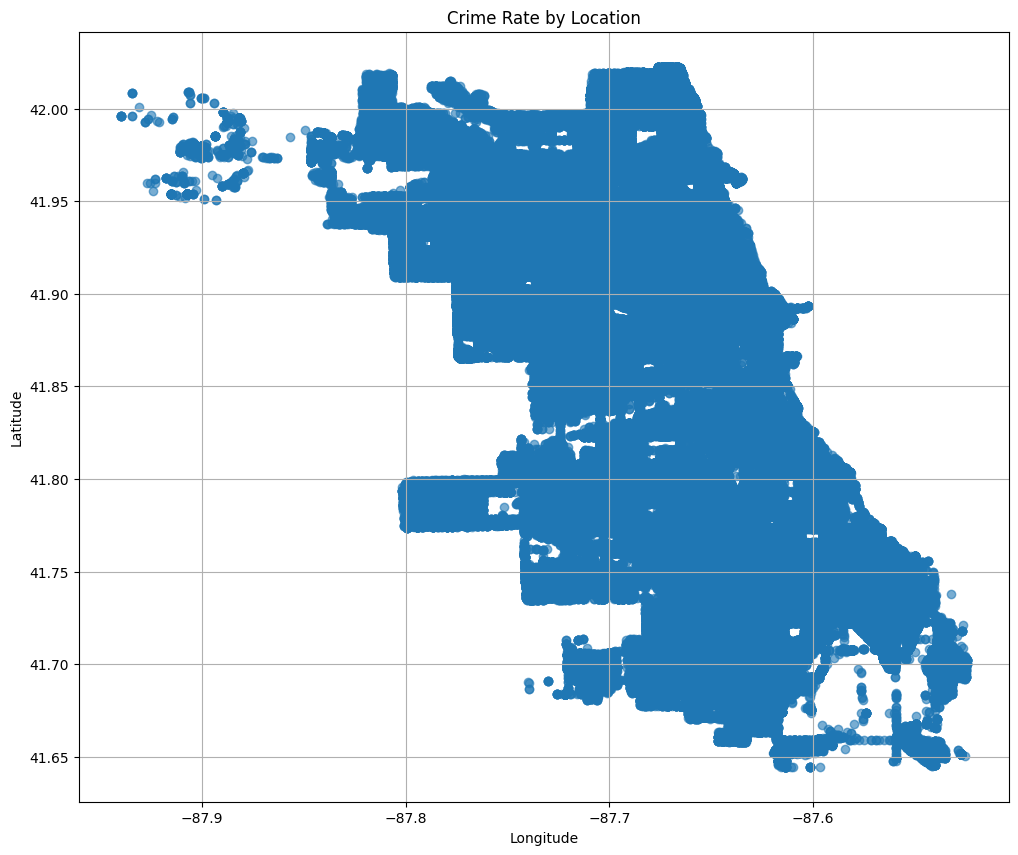

C:\Users\Shpig\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


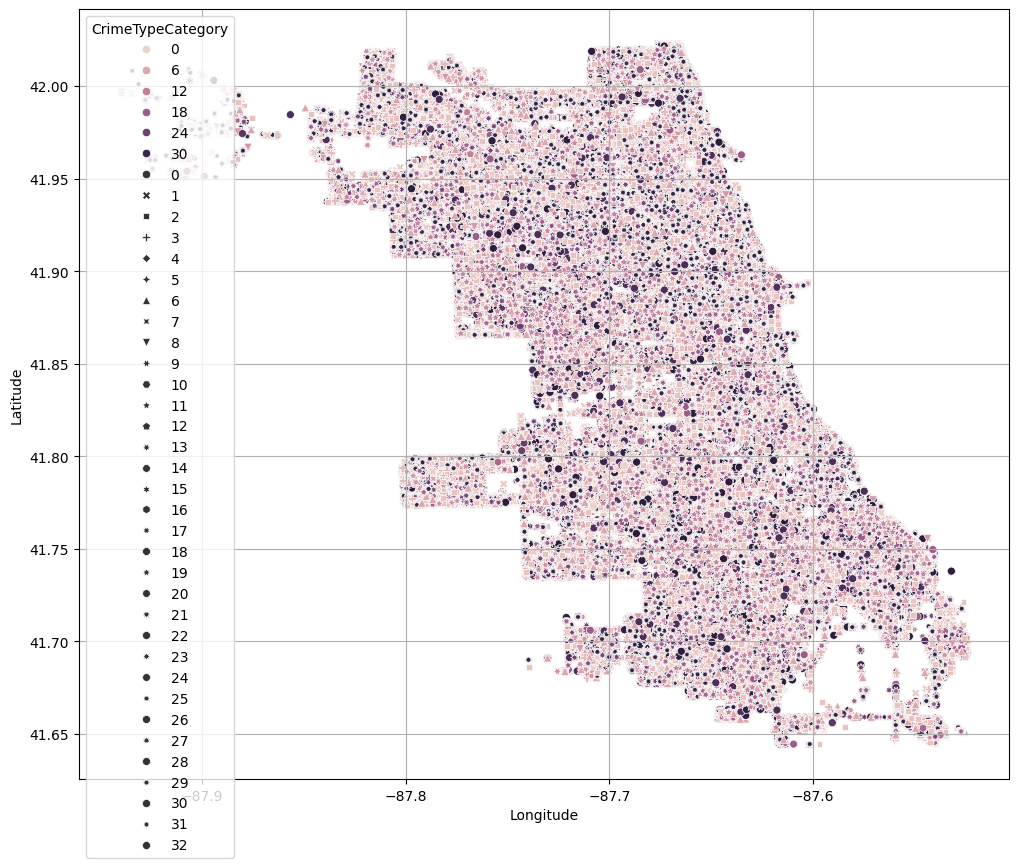

In [16]:
plt.figure(figsize=(18, 9))
# Plotting
plt.figure(figsize=(12, 10))
plt.scatter(chicago_filtered['Longitude'], chicago_filtered['Latitude'], alpha=0.6,)
plt.title('Crime Rate by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,10))
sb.scatterplot(x = chicago_filtered['Longitude'], y = chicago_filtered['Latitude'], hue=df2["CrimeTypeCategory"], style=df2["CrimeTypeCategory"])
plt.grid(True)
plt.show()

<Axes: xlabel='Year'>

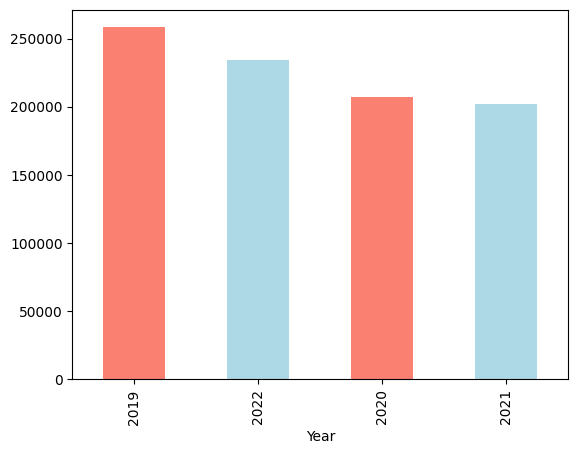

In [91]:
df2.Year.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [97]:
# let us convert the pd.timedate data into periods
df2['Period'] = pd.PeriodIndex(df2['Date-Time'], freq='Q')
df2 = pd.get_dummies(df2, columns=['Period'])
df2 = pd.get_dummies(df2, columns = ['District'], prefix = 'District_')

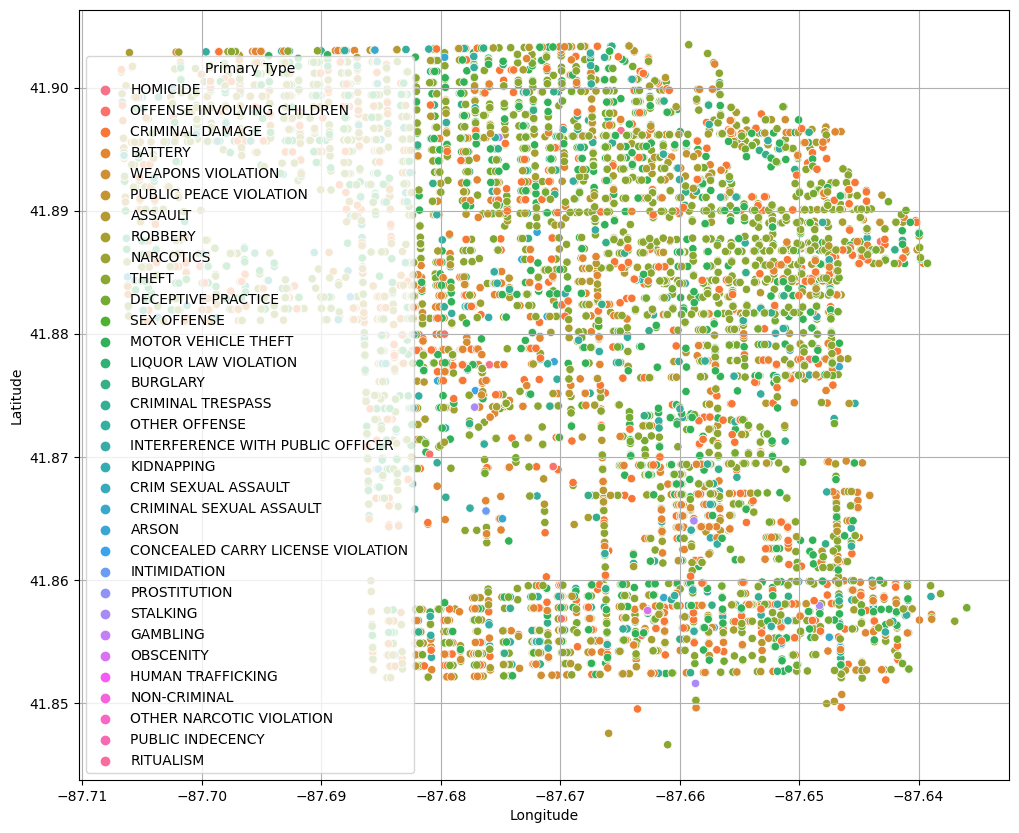

In [90]:
high = df2[df2['District'] == 12]
plt.figure(figsize=(12,10))
sb.scatterplot(x = high['Longitude'], y = high['Latitude'], hue=df2["Primary Type"])
plt.grid(True)
plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

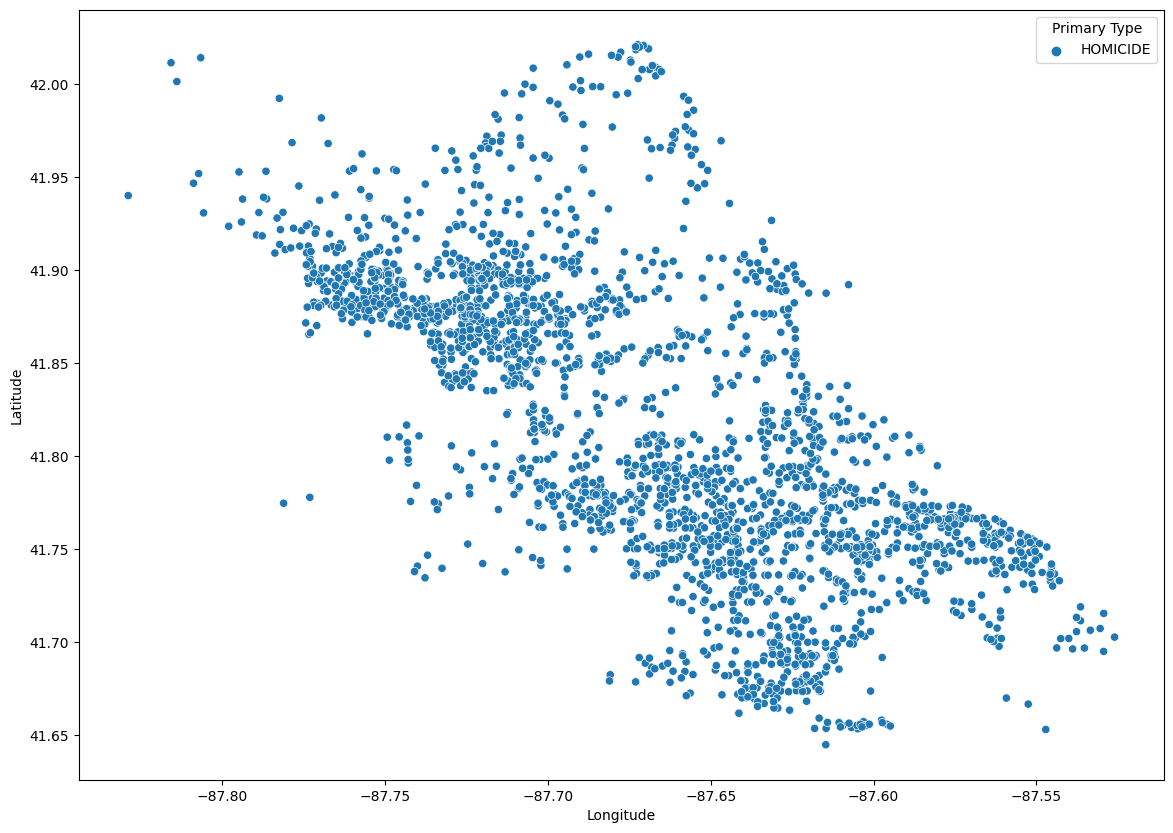

In [86]:
homicides = df2[df2['Primary Type'] == 'HOMICIDE']
plt.figure(figsize=(14,10))
sb.scatterplot(x = chicago_filtered['Longitude'], y = chicago_filtered['Latitude'], hue=homicides["Primary Type"])

In [121]:
df2.Date = pd.to_datetime(df2.Date, format='%m/%d/%Y %I:%M:%S %p')

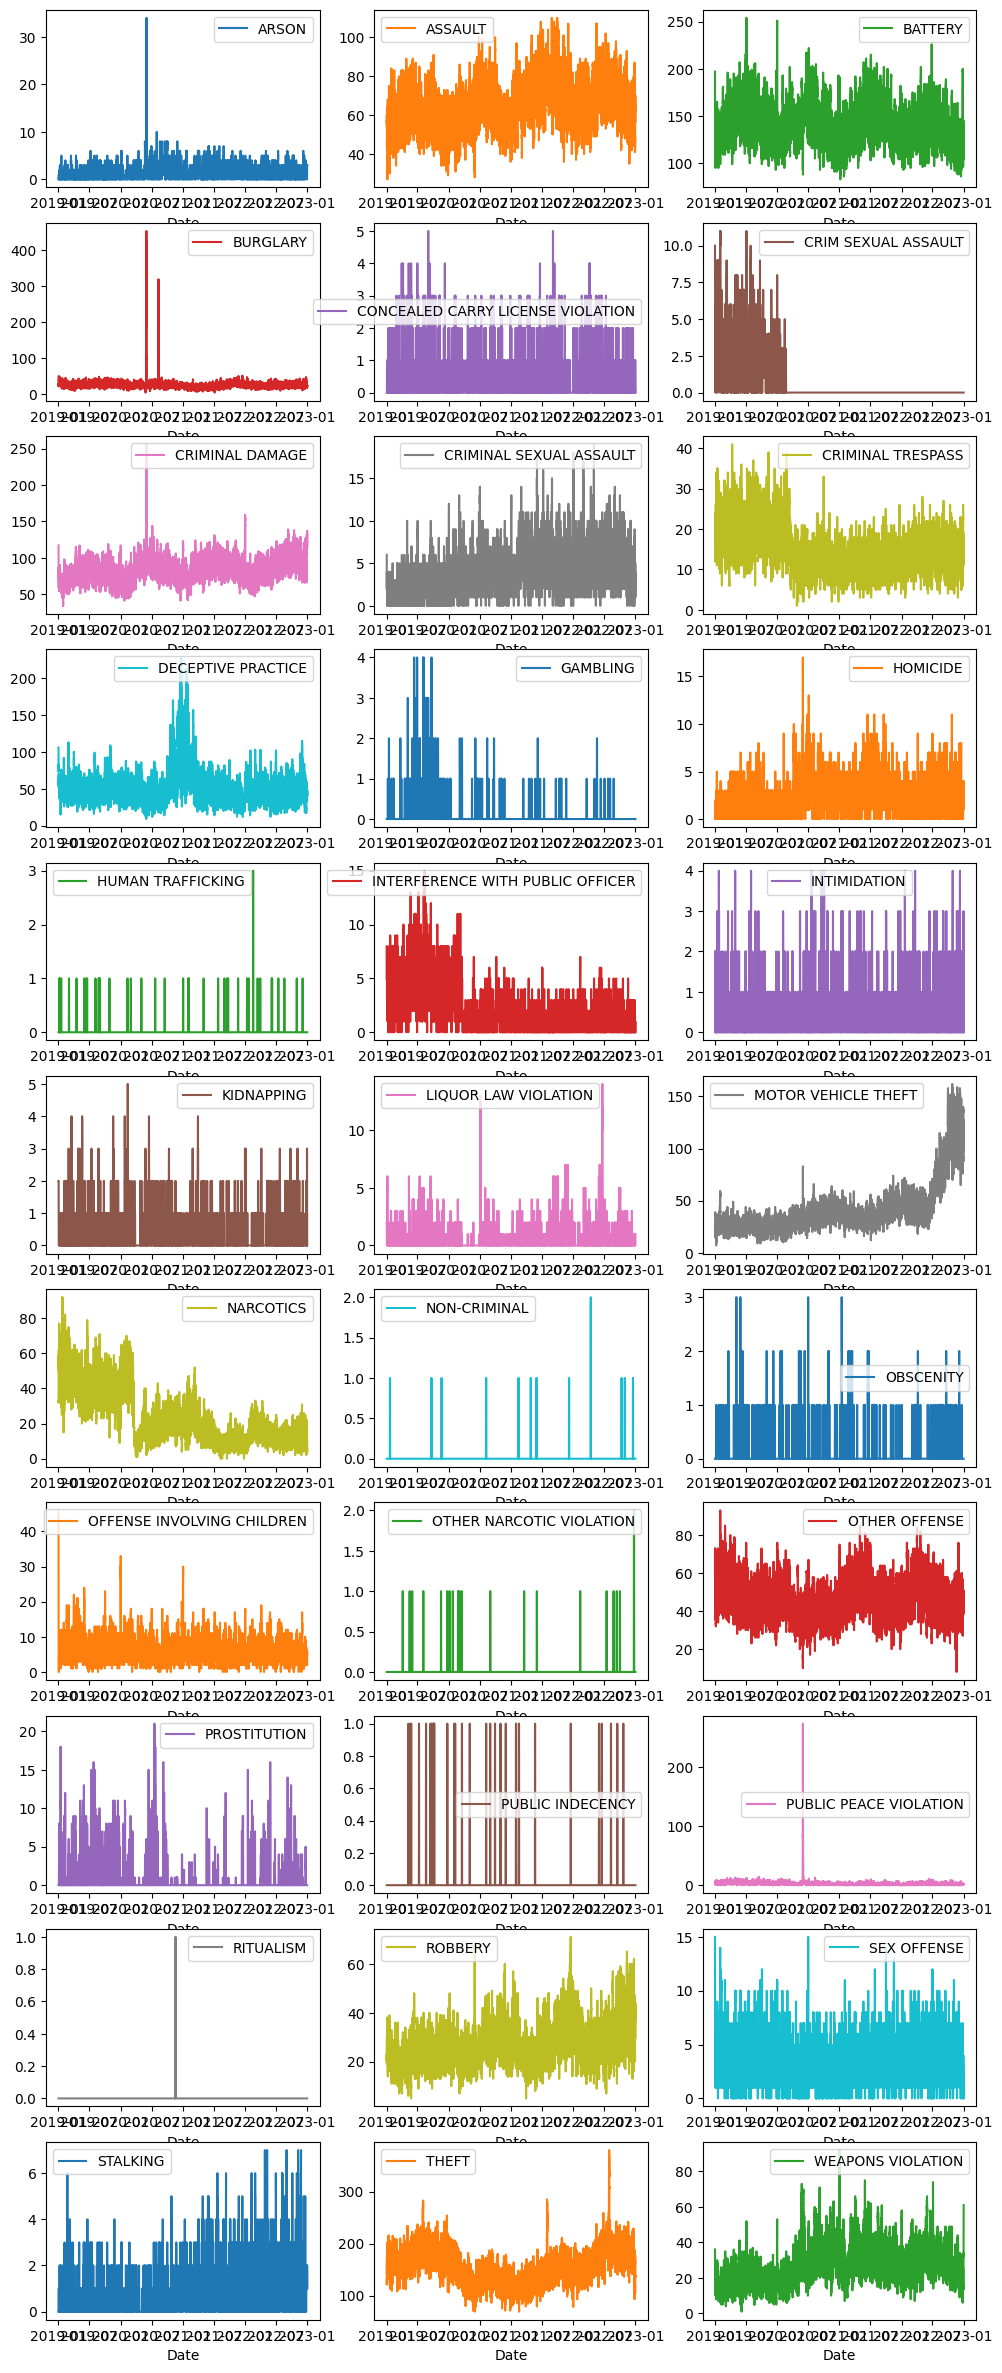

In [125]:
# analyze the most frequent crime codes
#crime_types = " ".join(crime for crime in df2['IUCR'])
crimes_date = df2.pivot_table('ID', aggfunc=np.size, columns='Primary Type',
                              index = df2.Date, fill_value=0)
crimes_date.index = pd.DatetimeIndex(crimes_date.index)
plot = crimes_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True,
                                           layout=(-1, 3), sharex=False, sharey=False)

<Axes: xlabel='count', ylabel='Primary Type'>

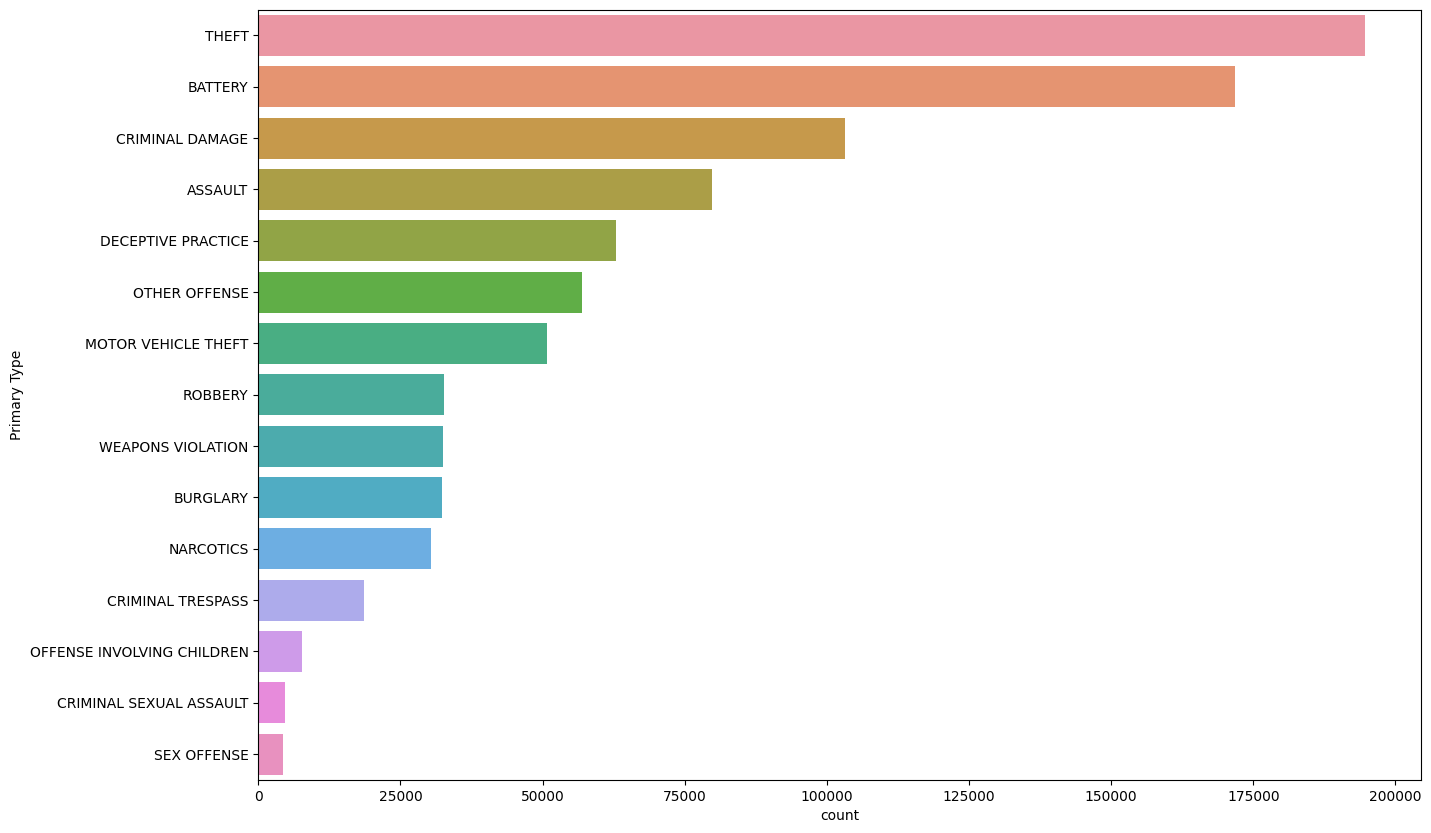

In [132]:
plt.figure(figsize = (15, 10))
sns.countplot(y ='Primary Type', data = df2, order = df2['Primary Type'].value_counts().iloc[:15].index)

<Axes: xlabel='count', ylabel='Location Description'>

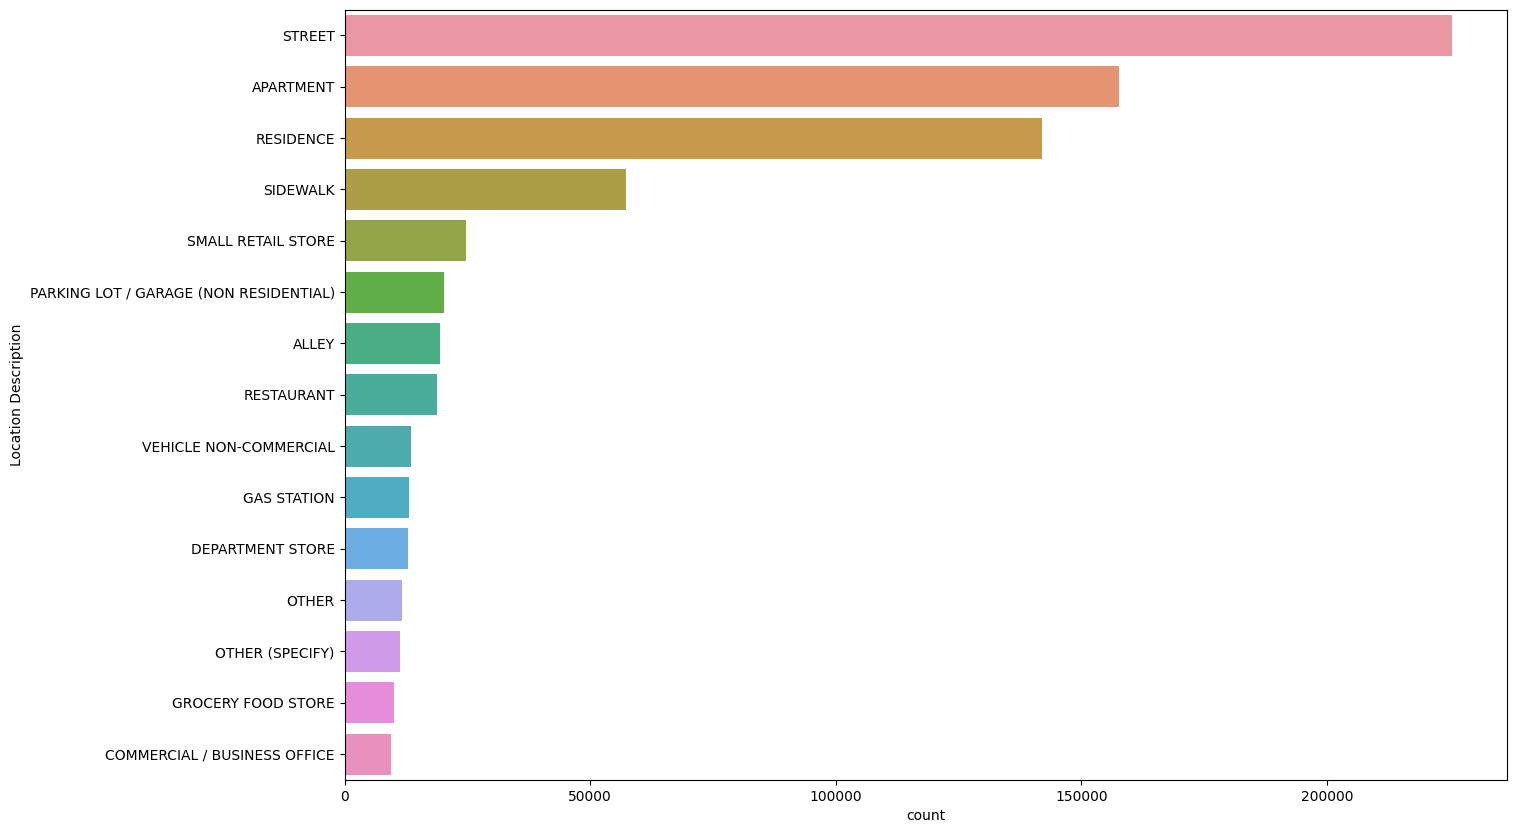

In [130]:
plt.figure(figsize = (15, 10))
sns.countplot(y='Location Description', data = df2, order = df2['Location Description'].value_counts().iloc[:15].index)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)